# Exploration Loan Data from Prosper
## by Jannis

## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import io

%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
# Loading the dataset with request libary and saving dataset as CSV file
url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
response = requests.get(url).content
data = pd.read_csv(io.StringIO(response.decode('utf-8')))
data.to_csv('loan_data.csv')

In [3]:
# creating new data frame called loan_data
loan_data = pd.read_csv('loan_data.csv')
loan_data.head()

,Unnamed: 0,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,...,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,...,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,...,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,...,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,...,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,...,11000.0,9947.9,NaN,0,NaN,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# high-level overview of data shape and composition
print(loan_data.shape)
print(loan_data.dtypes)

(113937, 82)
Unnamed: 0                               int64
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object


### The structure of the dataset

The Data set contains 113,937 loans (rows) with 81 variables (columns) on each loan. Most variables are integers (numeric) or strings (objects). But the dataset also has some categorical variables: for example EmploymentStatus, ProsperScore, Term, IncomeRange

### Main features of interest in the dataset

The huge dataset with a lot of informaton (81 variables) allows me to have deeper look at the question what factors affect a loan’s outcome status (Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue)?

This is a very critical question for banks and loan companies in order to minimize the default risk and and to set the right interest rate (including setting a proper risk premium).

This investigation might help to find out what factors predict the outcome of a loan best. 
  


### Features in the dataset that will help support the investigation

The factors that have the most influence on predicting the outcome of a loan and therefore of most interest are:

 - Term (The length of the loan expressed in months)
 - ProsperScore (custom risk score)
 - EmploymentStatus (The employment status of the borrower)
 - MonthlyLoanPayment (The scheduled monthly loan payment)
 - IncomeRange (The income range of the borrower at the time the listing was created)
 - BorrowerRate (The Borrower's interest rate for this loan)
 - LoanOriginalAmount (The origination amount of the loan)
 - OpenCreditLines (Number of open credit line)
 - TotalProsperPaymentsBilled (number of on time payments the borrower made on Prosper loans at the time they created this listing)
 - Recommendations (Number of recommendations the borrower had at the time the listing was created)

Whereby I expect  to have  `ProsperScore`, `TotalProsperPaymentsBilled`, `EmploymentStatus`, `BorrowerRate`,  (high interest rate are associated with higher default risk) and `Income Range`  have  the strongest effect on the loan's outcome status.
 

#### In the first step I will create a copy of the dataset with the variables of interest

In [4]:
# create a copy of the dataset
loan_data_clean = loan_data.copy()
# include all variables that are needed in the investigation in the clean copy
loan_data_clean = loan_data_clean[['ListingKey', 'LoanStatus', 'Term','ProsperScore','EmploymentStatus', 'MonthlyLoanPayment', 'Recommendations','BorrowerAPR','BorrowerRate','LoanOriginalAmount', 'OpenCreditLines','StatedMonthlyIncome','TotalProsperPaymentsBilled', 'IncomeRange']]
#getting a overview over the new dataset
print(loan_data_clean.head())
print(loan_data_clean.info())

                ListingKey LoanStatus  Term  ProsperScore EmploymentStatus  \
0  1021339766868145413AB3B  Completed    36           NaN    Self-employed   
1  10273602499503308B223C1    Current    36           7.0         Employed   
2  0EE9337825851032864889A  Completed    36           NaN    Not available   
3  0EF5356002482715299901A    Current    36           9.0         Employed   
4  0F023589499656230C5E3E2    Current    36           4.0         Employed   

   MonthlyLoanPayment  Recommendations  BorrowerAPR  BorrowerRate  \
0              330.43                0      0.16516        0.1580   
1              318.93                0      0.12016        0.0920   
2              123.32                0      0.28269        0.2750   
3              321.45                0      0.12528        0.0974   
4              563.97                0      0.24614        0.2085   

   LoanOriginalAmount  OpenCreditLines  StatedMonthlyIncome  \
0                9425              4.0          3083.

#### Since the variables EmploymentStatus, ProsperScore, Term, IncomeRange are basically categorical variabels, I will change their datatype till categorical

In [5]:
# changing the datatypes till categorical
loan_data_clean['ProsperScore'] = loan_data_clean['ProsperScore'].astype('category')
loan_data_clean['Term'] = loan_data_clean['Term'].astype('category')
loan_data_clean['IncomeRange'] = loan_data_clean['IncomeRange'].astype('category')
loan_data_clean['EmploymentStatus'] = loan_data_clean['EmploymentStatus'].astype('category')
loan_data_clean['LoanStatus'] = loan_data_clean['LoanStatus'].astype('category')
print(loan_data_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
ListingKey                    113937 non-null object
LoanStatus                    113937 non-null category
Term                          113937 non-null category
ProsperScore                  84853 non-null category
EmploymentStatus              111682 non-null category
MonthlyLoanPayment            113937 non-null float64
Recommendations               113937 non-null int64
BorrowerAPR                   113912 non-null float64
BorrowerRate                  113937 non-null float64
LoanOriginalAmount            113937 non-null int64
OpenCreditLines               106333 non-null float64
StatedMonthlyIncome           113937 non-null float64
TotalProsperPaymentsBilled    22085 non-null float64
IncomeRange                   113937 non-null category
dtypes: category(5), float64(6), int64(2), object(1)
memory usage: 8.4+ MB
None


## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest
 - ProsperScore 
 - TotalProsperPaymentsBilled
 - BorrowerRate
 - EmploymentStatus
 - IncomeRange

Source for all interpretations:
https://www.dummies.com/education/math/statistics/statistics-workbook-for-dummies-cheat-sheet/

Diamonds Data Exploration- Example Project

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.




> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [7]:
# getting a first overview over the variable LoanStatus
print(loan_data_clean.LoanStatus.describe())
print(loan_data_clean.LoanStatus.value_counts())

count      113937
unique         12
top       Current
freq        56576
Name: LoanStatus, dtype: object
Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64


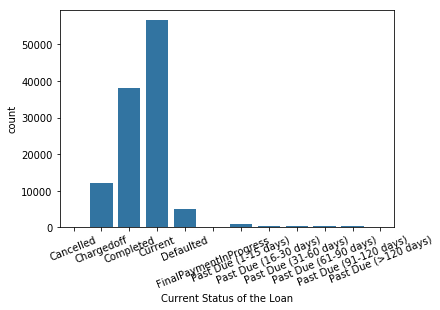

In [8]:
# bar chart LoanStatus (The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue)
base_color = sb.color_palette()[0]
sb.countplot(data = loan_data_clean, x = 'LoanStatus', color = base_color)
plt.xlabel('Current Status of the Loan')
plt.xticks(rotation = 22);

In the next step I will transform the past due to just one.. since I mostly interested if a loan is past due and not for how long the loan is overdue. 

In [6]:
# replacing Past Due (1-15 days), Past Due (31-60 days) etc. with just Past Due
loan_data_clean['LoanStatus'] = loan_data_clean['LoanStatus'].replace(['Past Due (1-15 days)', 'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','Past Due (>120 days)'],'Past Due')
loan_data_clean['LoanStatus'] = loan_data_clean['LoanStatus'].replace('FinalPaymentInProgress','InProgress')
print(loan_data_clean.LoanStatus.value_counts())
print(loan_data_clean.info())

Current       56576
Completed     38074
Chargedoff    11992
Defaulted      5018
Past Due       2067
InProgress      205
Cancelled         5
Name: LoanStatus, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
ListingKey                    113937 non-null object
LoanStatus                    113937 non-null object
Term                          113937 non-null category
ProsperScore                  84853 non-null category
EmploymentStatus              111682 non-null category
MonthlyLoanPayment            113937 non-null float64
Recommendations               113937 non-null int64
BorrowerAPR                   113912 non-null float64
BorrowerRate                  113937 non-null float64
LoanOriginalAmount            113937 non-null int64
OpenCreditLines               106333 non-null float64
StatedMonthlyIncome           113937 non-null float64
TotalProsperPaymentsBilled    22085 non-null float64
IncomeRange          

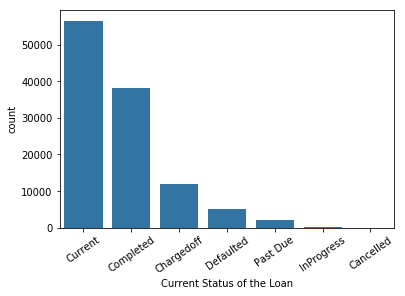

In [10]:
# plotting the bar chart of LoanStatus again
base_color = sb.color_palette()[0]
sb.countplot(data = loan_data_clean, x = 'LoanStatus', color = base_color, order = loan_data_clean['LoanStatus'].value_counts().index )
plt.xlabel('Current Status of the Loan')
plt.xticks(rotation = 35);

#### Most of the loans are current or completed. However there are a fairly significant number of loans that are charged off, defaulted or past due. 

In [11]:
# getting a first overview over the variable ProsperScore
print(loan_data_clean.ProsperScore.describe())
print(loan_data_clean.ProsperScore.value_counts())

count     84853.0
unique       11.0
top           4.0
freq      12595.0
Name: ProsperScore, dtype: float64
4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64


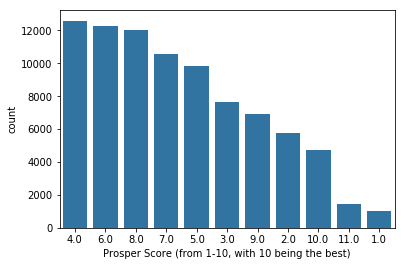

In [12]:
# Bar Chart ProsperScore (custom risk score built using historical Prosper data)
# The score ranges from 1-10, with 10 being the best, or lowest risk score)

sb.countplot(data = loan_data_clean, x = 'ProsperScore', color = base_color, order = loan_data_clean['ProsperScore'].value_counts().index)
plt.xlabel('Prosper Score (from 1-10, with 10 being the best)');

The bar chart shows that there are customers in the data set that have a score of 11 which should not be possible since the score just ranges from 1-10 which needs to be cleaned in the next step

In [13]:
# I will exclude all customers with a Prosper Score of 11
loan_data_clean = loan_data_clean[loan_data_clean['ProsperScore'] != 11]
#dubbel check if the operation was succesful
loan_data_clean[loan_data_clean['ProsperScore'] == 11]

,ListingKey,LoanStatus,Term,ProsperScore,EmploymentStatus,MonthlyLoanPayment,Recommendations,BorrowerAPR,BorrowerRate,LoanOriginalAmount,OpenCreditLines,StatedMonthlyIncome,TotalProsperPaymentsBilled,IncomeRange


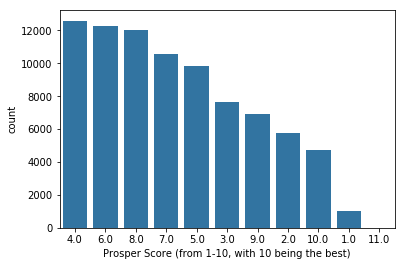

In [14]:
# now I will again plot the bar chart
sb.countplot(data = loan_data_clean, x = 'ProsperScore', color = base_color, order = loan_data_clean['ProsperScore'].value_counts().index)
plt.xlabel('Prosper Score (from 1-10, with 10 being the best)');

#### Most of the borrower have a fairly low Prosper Score of 4 (custom risk score) while the majority of the customer have a score between 5-8. You can also see that even customers with the low risks score of 1 or 2 did get a loan from Prosper. Furthermore, not many borrowers received the highest score of 10

In [15]:
# getting a first overview over the TotalProsperPaymentsBilled
loan_data.TotalProsperPaymentsBilled.describe()

count    22085.000000
mean        22.934345
std         19.249584
min          0.000000
25%          9.000000
50%         16.000000
75%         33.000000
max        141.000000
Name: TotalProsperPaymentsBilled, dtype: float64

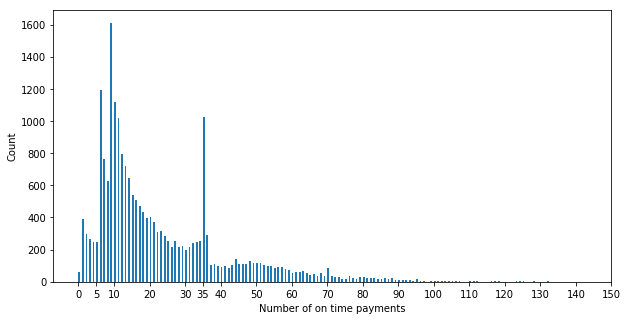

In [16]:
# Histogramm TotalProsperPaymentsBilled (Number of on time payments)
binsize = 0.5
bins = np.arange(loan_data_clean.TotalProsperPaymentsBilled.min(), loan_data_clean.TotalProsperPaymentsBilled.max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = loan_data_clean, x = 'TotalProsperPaymentsBilled', bins = bins)
plt.xlabel('Number of on time payments')
plt.ylabel('Count')
plt.xticks([0,5,10,20,30,35,40,50,60,70,80,90,100,110,120,130,140,150])
plt.show()

#### The distribution of the Number of on time payments is long-tailed with two peaks: 9 and 35. It is interesting to see that the distribution is right-skewed with most of the values on the lower end and fewer values on the higher end. But we observe a second uprise between 30-36. This would make the distribution roughly bi-modial. On the first view it therefore seems like that most of the borrowers had missed to pay some of the monthly payments on time.

In [17]:
# getting a first overview over the variable BorrowerRate
loan_data.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

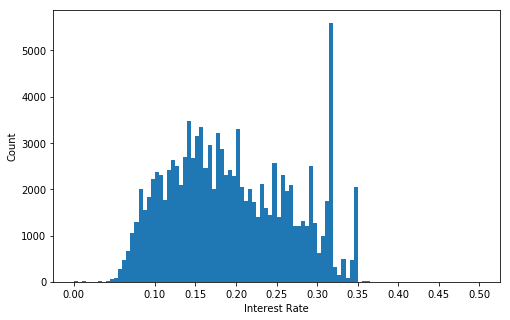

In [18]:
# Histogramm  BorrowerRate (Borrower's interest rate for this loan)
binsize = 0.005
bins = np.arange(loan_data.BorrowerRate.min(), loan_data.BorrowerRate.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data_clean, x = 'BorrowerRate', bins = bins)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.xticks([0.0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])
plt.show()

#### One can see in the histogramm that most of the borrowers have an interest rate between of 0.1 and 0.25, but with a peak at around 0.33. 

In [19]:
# getting a first overview over the variable IncomeRange
print(loan_data.IncomeRange.describe())
print(loan_data.IncomeRange.value_counts())


count             113937
unique                 8
top       $25,000-49,999
freq               32192
Name: IncomeRange, dtype: object
$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64


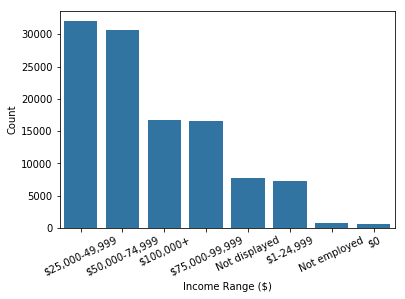

In [20]:
#Bar chart of the variable IncomeRange(The income range of the borrower at the time the listing was created)

sb.countplot(data= loan_data_clean, x= 'IncomeRange', color= base_color, order=loan_data_clean['IncomeRange'].value_counts().index)
plt.xticks(rotation=25)
plt.xlabel('Income Range ($)')
plt.ylabel('Count');

#### The income range of the borrowers shows that most of the loans where give to customers with a income between 25,000 and 74,999 which indicates that the borrowers are mostly middle-class (https://www.cnbc.com/2018/09/26/how-many-americans-qualify-as-middle-class.html). However, there are a fairly high number of borrowers that earns more than 75,000. One can also see that people that are not employed, not displayed their income or have an income of 0 received a loan from Prosper as well. They might be other criterias than income that qualifies one to get a loan at Prosper.

In [21]:
# getting a first overview over the variable EmploymentStatus
loan_data_clean.EmploymentStatus.describe()

count       110226
unique           8
top       Employed
freq         65957
Name: EmploymentStatus, dtype: object

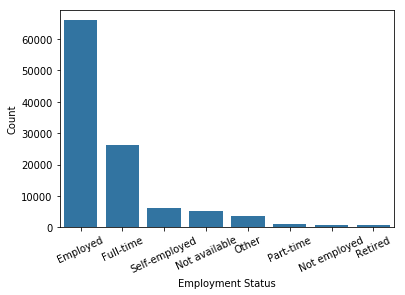

In [22]:
# plotting EmploymentStatus (The employment status of the borrower at the time they posted the listing) 
sb.countplot(data= loan_data_clean, x= 'EmploymentStatus', color= base_color, order=loan_data_clean['EmploymentStatus'].value_counts().index)
plt.xticks(rotation=25)
plt.xlabel('Employment Status')
plt.ylabel('Count');

#### As expected are most of the borrowers employed of some kind (full-time, part-time, self-emplpoyed) but the data shows that even unemployed and retired persons could get a loan.

#### Now I also will plot the remainig factors:

 - Term                                       
 - Recommendations                   
 - BorrowerAPR                                    
 - OpenCreditLines
 - LoanOriginalAmount 
 - MonthlyLoanPayment
               
  

In [23]:
# getting a first overview over the variable Term
print(loan_data_clean.Term.describe())
print(loan_data_clean.Term.value_counts())

count     112481
unique         3
top           36
freq       86729
Name: Term, dtype: int64
36    86729
60    24138
12     1614
Name: Term, dtype: int64


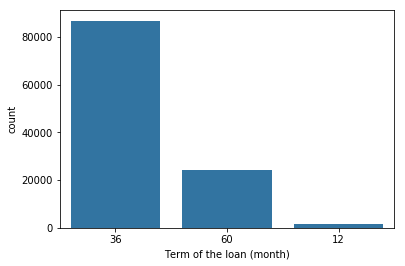

In [24]:
# Bar chart of the variable Term (The length of the loan expressed in months)
sb.countplot(data=loan_data_clean, x='Term', color=base_color, order = loan_data_clean['Term'].value_counts().index)
plt.xlabel('Term of the loan (month)');


In [25]:
loan_data_clean.LoanOriginalAmount.mean()

8252.601132635735

#### Most of the loans have of length of 36 months, followed by 60 months while just a small amounts of loans have the minium lenght of 12 months. The fact that most of the loans have a length of just 36 months might correlated to the fact the average loan amount is around 8200 dollar which can be paid back quick. 

In [26]:
# getting a first overview over the variable BorrowerAPR
print(loan_data_clean.Recommendations.describe())
print(loan_data_clean.Recommendations.value_counts())

count    112481.000000
mean          0.048221
std           0.333715
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          39.000000
Name: Recommendations, dtype: float64
0     108264
1       3480
2        562
3        108
4         26
5         14
9          6
7          5
6          4
8          3
16         2
18         2
24         1
14         1
19         1
21         1
39         1
Name: Recommendations, dtype: int64


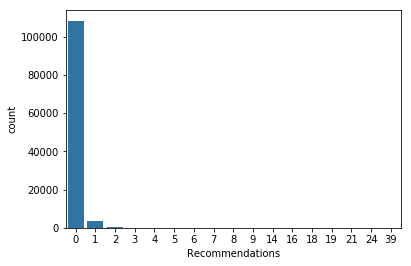

In [27]:
# plotting Recommendations(Number of recommendations the borrower had at the time of the loan)
sb.countplot(data=loan_data_clean, x = 'Recommendations', color = base_color);

Since most of the data is next to y axis, there might be strong outliers within the higher values

In [28]:
# identifying outliers based on the plot
Recommendations_outliers = loan_data_clean['Recommendations'] > 5
print(Recommendations_outliers.sum())
print(loan_data_clean.loc[Recommendations_outliers,:])

27
                     ListingKey  LoanStatus Term ProsperScore  \
4470    30193394811321396D90EC5  Chargedoff   36          NaN   
8060    01F03433451795526F41763  Chargedoff   36          NaN   
14716   9A8434160319414122B8E0C   Completed   36          NaN   
15545   D4463388295350470A50968   Completed   36          NaN   
17717   D05234067009139905384E0   Completed   36          NaN   
23350   9E8D3412586408665241CA5   Completed   36          NaN   
28057   353E33998807982288C01F5   Completed   36          NaN   
50340   58E13410981598681A5DF60   Completed   36          NaN   
52890   5BB633982112627738EF19D   Completed   36          NaN   
54760   FF4034053057181163C6BFD   Completed   36          NaN   
60934   BE8A340462048538177C357   Completed   36          NaN   
62664   83343393410481420A567DB   Completed   36          NaN   
69534   3FF7342040880736799B481   Completed   36          NaN   
70491   FF473424815789588FDF05F   Completed   36          NaN   
72601   3C843390871875

Since the customers with more than 5 recommendations also have a high number of open credit lines (this might be the reason for high recommendations), the outliers are not errors in the data set.

#### One can see that most of the borrowers had 0 recommendations which suggest that the recommendations play a small role in the evalutation of a loan request.

In [29]:
# getting a first overview over the variable OpenCreditLines
loan_data_clean.OpenCreditLines.describe()

count    104877.000000
mean          9.231633
std           5.018118
min           0.000000
25%           6.000000
50%           8.000000
75%          12.000000
max          54.000000
Name: OpenCreditLines, dtype: float64

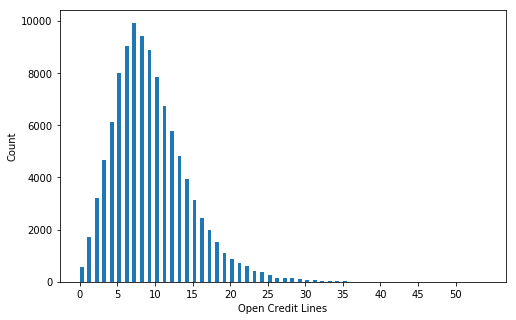

In [30]:
# Histogramm OpenCreditLines (Number of open credit lines at the time the credit profile was pulled)
binsize = 0.5
bins = np.arange(0, loan_data_clean.OpenCreditLines.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data_clean, x = 'OpenCreditLines', bins = bins)
plt.xlabel('Open Credit Lines')
plt.ylabel('Count')
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])
plt.show()

#### The distribution is long-tailed and right skewed with most borrowers having between 5 and 15 open credit lines. This sounds much but without having information more information of the amount of the loans, it is hard to give a more detailed statement


In [31]:
# getting a first overview over the variable LoanOriginalAmount
print(loan_data_clean.LoanOriginalAmount.describe())
print(loan_data_clean.LoanOriginalAmount.value_counts().head(20))

count    112481.000000
mean       8252.601133
std        6172.040285
min        1000.000000
25%        4000.000000
50%        6001.000000
75%       11500.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64
4000     14289
15000    12176
10000    10994
5000      6941
2000      6029
3000      5722
25000     3536
1000      3206
20000     3070
2500      2982
7500      2965
7000      2936
6000      2839
3500      2552
8000      2418
12000     1872
9000      1665
1500      1507
13000     1477
4500      1397
Name: LoanOriginalAmount, dtype: int64


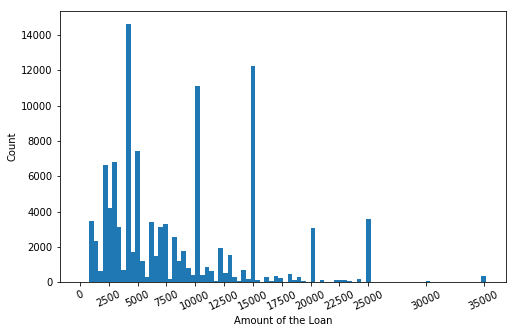

In [32]:
# Histogramm LoanOriginalAmount (The origination amount of the loan)
binsize = 400
bins = np.arange(0, loan_data_clean.LoanOriginalAmount.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Amount of the Loan')
plt.ylabel('Count')
plt.xticks([0,2500,5000,7500,10000,12500,15000,17500,20000,22500,25000,30000,35000], rotation=25)
plt.show()

#### The distribution has serval peaks at around 4,000, 10,000 and 15,000. But most of the values are in the lower end between 2500 and 10,000. The most loaned amounts are 4,000 and 15,000. Its a little bit suprising that the two most loaned amounts have such a difference in terms of the loan amount. One would expect one peak but maybe Prosper targets several customer groups.

In [33]:
# getting a first overview over the variable MonthlyLoanPayment
print(loan_data_clean.MonthlyLoanPayment.describe())

count    112481.000000
mean        270.513906
std         191.234362
min           0.000000
25%         130.760000
50%         215.990000
75%         369.040000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64


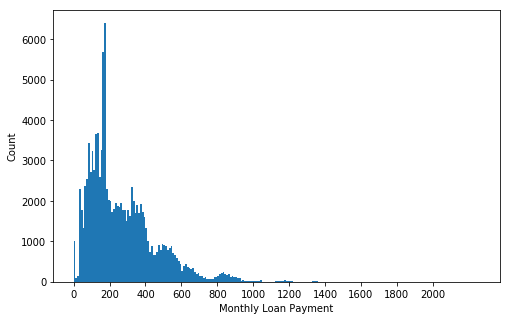

In [34]:
# Histogramm MonthlyLoanPayment (scheduled monthly loan payment)
binsize = 10
bins = np.arange(loan_data_clean.MonthlyLoanPayment.min(), loan_data_clean.MonthlyLoanPayment.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data_clean, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Count')
plt.xticks([0,200,400,600,800,1000,1200,1400,1600,1800,2000])
plt.show()

#### The distribution is right skrewed and long-tailed with a lot of loans with small montly payments. The peak is at around 200. A strange observation is the fact that around 1000 loans have a monthly payment of 0 which doesnt really make sense but might be related to some special arrangement (for example: the customer does not need to pay back the loan during the first 6 months). Therefore, I decided to the keep these values in the dataset.

### Discussion of the distributions of the variables of interest. 

#### 1. Distributions

 - Most of the loans are current or completed. However there are a fairly significant number of loans that are    
   charged off, defaulted or past due. 
 - The income range of the borrowers shows that most of the loans where give to customers with a income between  
   25,000 and 74,999 which indicates that the borrowers are mostly middle-class.

 - Most of the borrower have a fairly low Prosper Score of 4 (custom risk score) while the majority of the customer   
   have a score between 5-8. You can also see that even customers with the low risks score of 1 or 2 did get a loan   
   from Prosper. Furthermore, not many borrowers received the highest score of 10.

 - The distribution of the lenght of the loan (Term) shows that most of the loans have of length of 36 months,  
   followed by 60 months while just a small amounts of loans have the minium lenght of 12 months.

 - The distribution of the Number of on time payments is long-tailed with two peaks: 9 and 35. It is interesting to  
   see that the distribution is right-skewed with most of the values on the lower end and fewer values on the higher    end. But we observe a second uprise between 30-36. This would make the distribution roughly bi-modial. On the   
   first view it therefore seems like that most of the borrowers had missed to pay some of the monthly payments on  
   time.

 - The distribution of the loan amount has serval peaks at around 4,000, 10,000 and 15,000. But most of the values  
   are in the lower end between 2500 and 10,000.

 - The distribution of the open credit line is long-tailed and right skewed with most borrowers having between 5 and    15 open credit lines.

#### 2. Unusual distributions
 - One can also see in the distribution of the Employment status that people that are not employed, not displayed  
   their income or have an income of 0 received a loan from Prosper as well. They might be other criterias than  
   income that qualifies one to get a loan at Prosper.
 - it was a little bit suprising that the distribution of the loan amounts has several peaks: the two most loaned  
   amounts (the two highest peaks in the distribution, 4000 & 15000) have such a difference in terms of the loan  
   amount. One would expect one peak; but maybe Prosper targets several customer groups
 - As expected are most of the borrowers employed of some kind (full-time, part-time, self-emplpoyed) but the data 
   shows that even unemployed and retired persons could get a loan.

#### 3.  tidy, adjust, or change the form of the data
 - Since the variables EmploymentStatus, ProsperScore, Term, IncomeRange are basically categorical variabels, I   
   changed their datatype till categorical

 - The bar chart of the Prosper Score showed that there are customers in the data set that have a score of 11 which      should not be possible since the score just ranges from 1-10 which I cleaned (removed them from the dataset)

 - around 1000 loans have a monthly payment of 0 which doesnt really make sense but might be related to some special 
   arrangement (for example: the customer does not need to pay back the loan during the first 6 months). Therefore, I 
   decided to the keep these values in the dataset.


## Bivariate Exploration

As mentoined, I am interested in the relationship between certain variables and the outcome of the loan (current status of the loan). So I will now plot the variables of interest against the outcome of the loan. 
Since the we have both categorical and numeric in the data set, I will plot those seperatly: the first part with numeric variables (I plot a violinplot and a boxplot for each variable) and the second part with categorical variables.
Since the loan status `current` and `FinalPaymentInProgress` doesnt really say much about the outcome and will change its status over time, the investigation will not put much emphasis on this status and rather focus on the ones that are completed versus the ones that defaultet, charged-off and past due

#### Part 1: Numeric Variabales

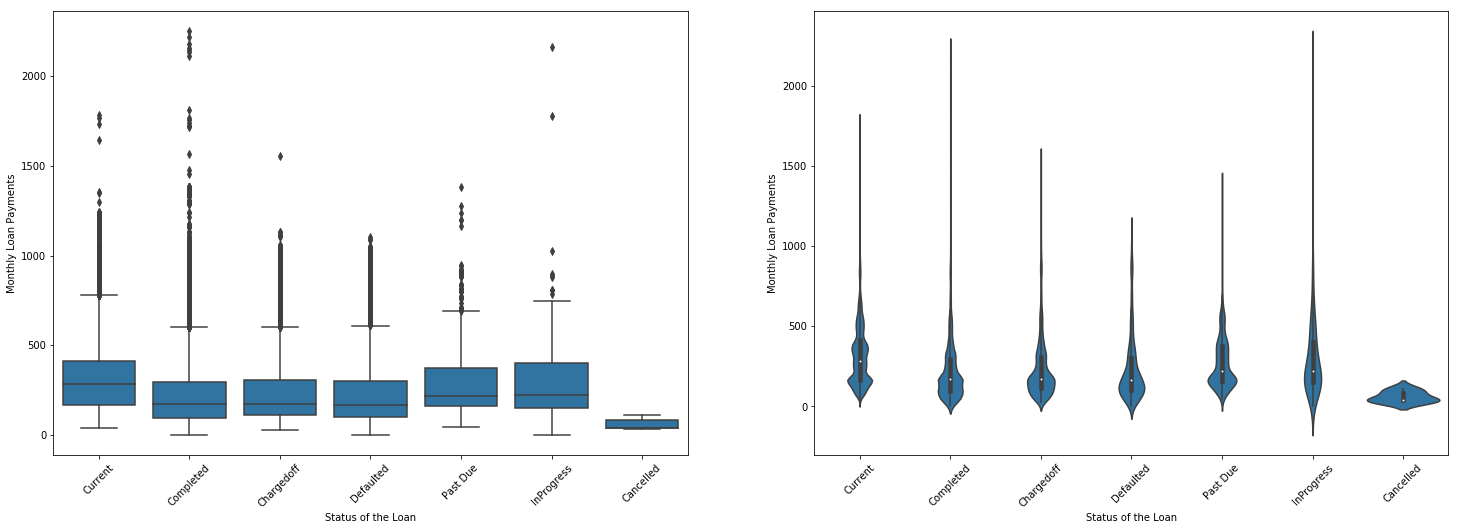

In [35]:
#plotting the monthy loan payment with a violinplot and a boxplot against LoanStatus 
plt.figure(figsize = [25, 18])

plt.subplot(2, 2, 1)
sb.boxplot(data = loan_data_clean, x = 'LoanStatus', y = 'MonthlyLoanPayment', color = base_color, order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan')
plt.ylabel('Monthly Loan Payments')

plt.subplot(2, 2, 2)
sb.violinplot(data = loan_data_clean, x = 'LoanStatus', y = 'MonthlyLoanPayment', color = base_color, order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan')
plt.ylabel('Monthly Loan Payments');

#### The plots show that there is relationship between the monthly payments and the negative outcome of the loan for Prosper: loans that are charged-off, loans with past due payments and defaulted loans have in average higher monthly payments.

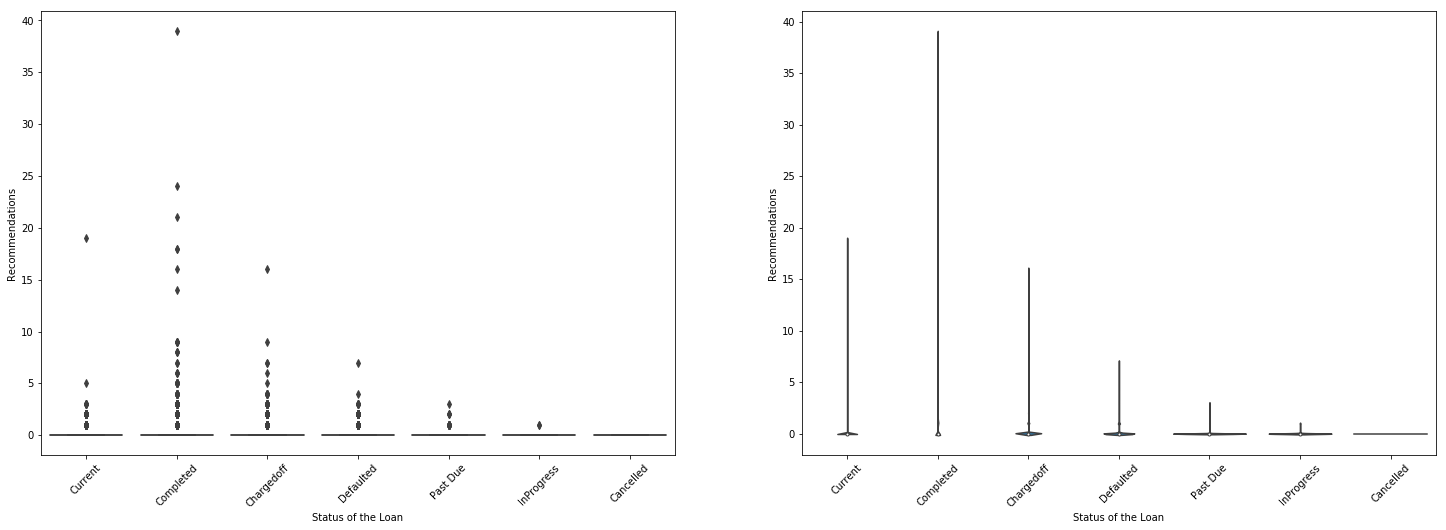

In [36]:
#plotting Recommendations with a violinplot and a boxplot against LoanStatus 
plt.figure(figsize = [25, 18])

plt.subplot(2, 2, 1)
sb.boxplot(data = loan_data_clean, x = 'LoanStatus', y = 'Recommendations', color = base_color, order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan')
plt.ylabel('Recommendations')

plt.subplot(2, 2, 2)
sb.violinplot(data = loan_data_clean, x = 'LoanStatus', y = 'Recommendations', color = base_color, order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan')
plt.ylabel('Recommendations');

#### The dataset resp. the plots doesnt give me the possibility to make a statment of the relationship between LoanStatus and Recommendations

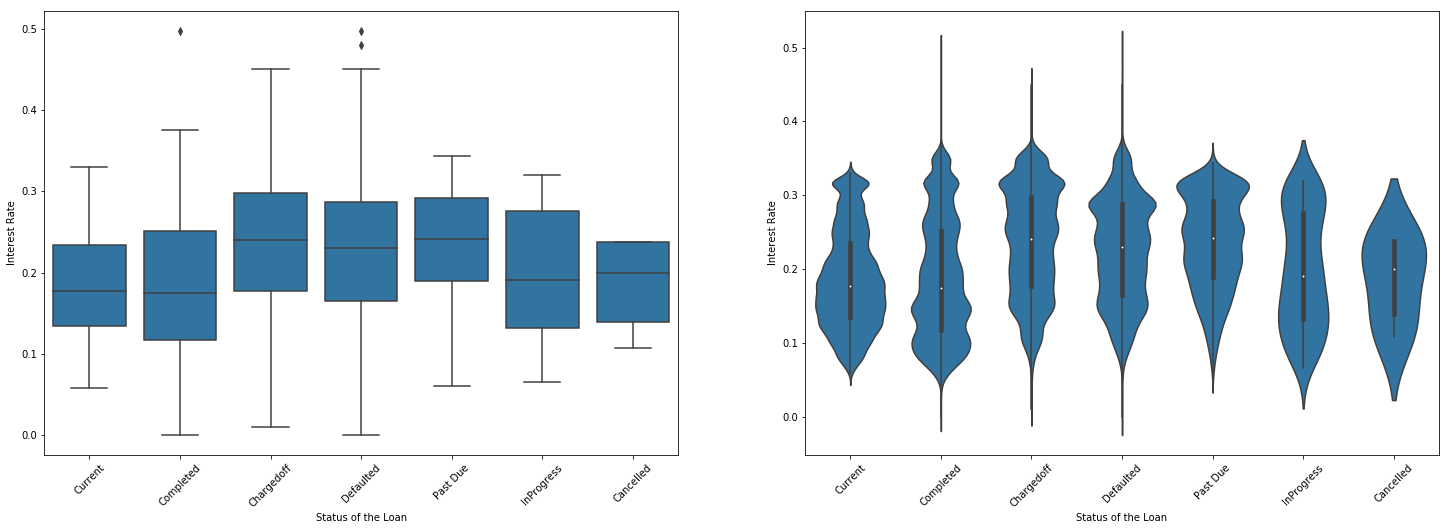

In [37]:
#plotting BorrowerRate (interest rate) with a violinplot and a boxplot against LoanStatus 
plt.figure(figsize = [25, 18])

plt.subplot(2, 2, 1)
sb.boxplot(data = loan_data_clean, x = 'LoanStatus', y = 'BorrowerRate', color = base_color, order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan')
plt.ylabel('Interest Rate')

plt.subplot(2, 2, 2)
sb.violinplot(data = loan_data_clean, x = 'LoanStatus', y = 'BorrowerRate', color = base_color, order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan')
plt.ylabel('Interest Rate');

#### The plots clearly show that loans that are charged-off, loans with past due payments and defaulted loans have in average higher interest rates than loans that are completed. The highest interest rates are asscociated with loans that are charged-off and with loans that have past due payments

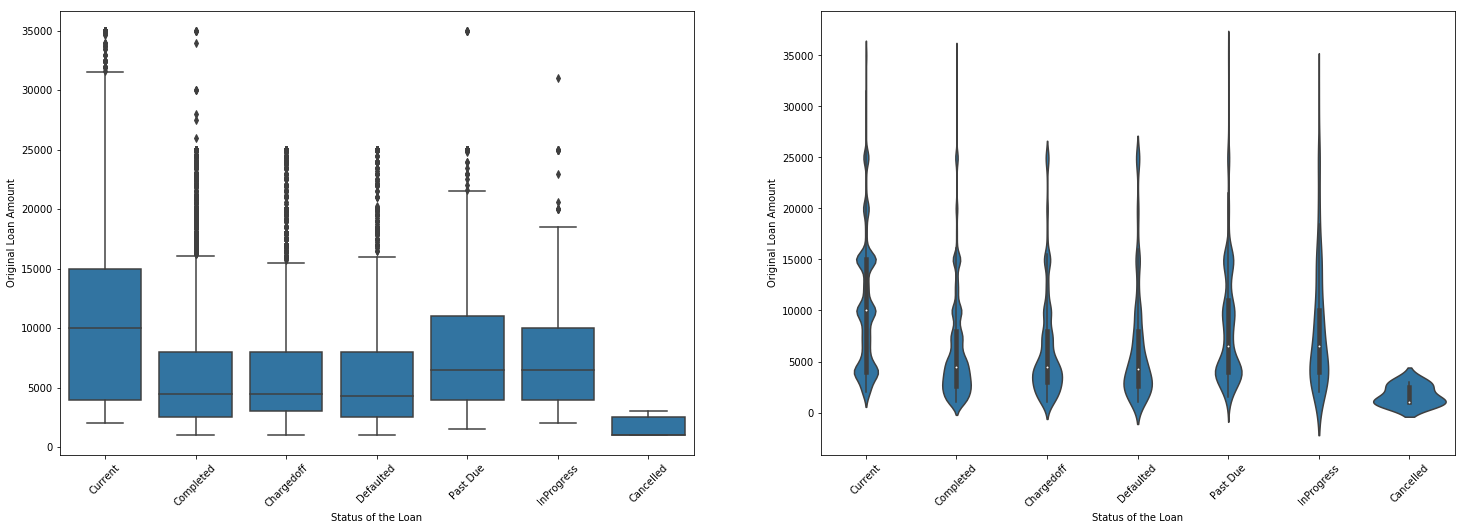

In [38]:
#plotting LoanOriginalAmount (Original Loan Amount) with a violinplot and a boxplot against LoanStatus 
plt.figure(figsize = [25, 18])

plt.subplot(2, 2, 1)
sb.boxplot(data = loan_data_clean, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color, order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan')
plt.ylabel('Original Loan Amount')

plt.subplot(2, 2, 2)
sb.violinplot(data = loan_data_clean, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color, order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan')
plt.ylabel('Original Loan Amount');

#### It seems that the original loan amount doesnt have an impact with the final status of the loan: the original loan amount is about the same in average for loans that are completed, charged-off or defaulted. However, loans with past due payments have in average an higher orginal loan amount

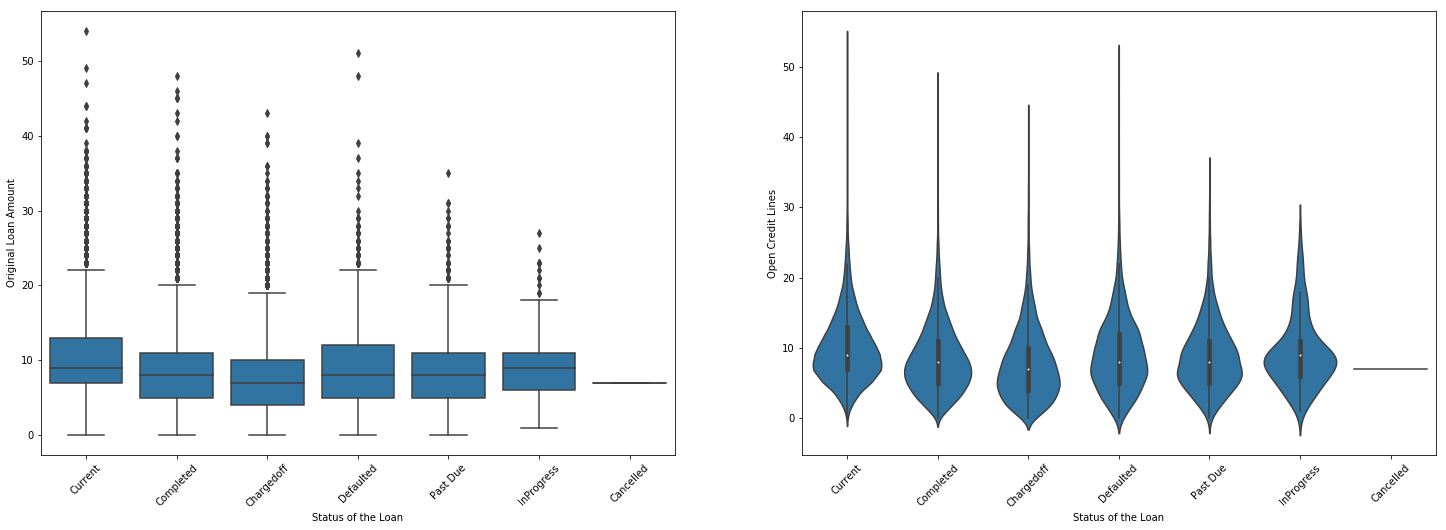

In [39]:
#plotting OpenCreditLines (Open Credit Lines) with a violinplot and a boxplot against LoanStatus 
plt.figure(figsize = [25, 18])

plt.subplot(2, 2, 1)
sb.boxplot(data = loan_data_clean, x = 'LoanStatus', y = 'OpenCreditLines', color = base_color, order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan')
plt.ylabel('Original Loan Amount')

plt.subplot(2, 2, 2)
sb.violinplot(data = loan_data_clean, x = 'LoanStatus', y = 'OpenCreditLines', color = base_color, order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan')
plt.ylabel('Open Credit Lines');

#### The amout of open credit lines doesnt have to have an impact on the outcome of a loan

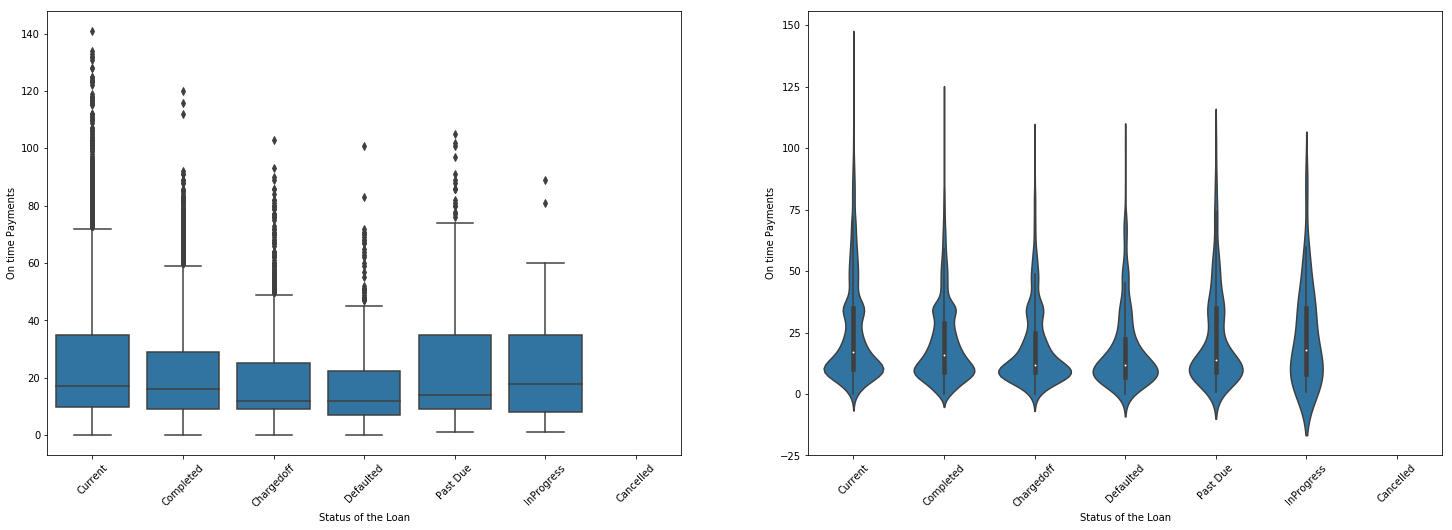

In [40]:
#plotting TotalProsperPaymentsBilled (On time Payments) with a violinplot and a boxplot against LoanStatus 
plt.figure(figsize = [25, 18])

plt.subplot(2, 2, 1)
sb.boxplot(data = loan_data_clean, x = 'LoanStatus', y = 'TotalProsperPaymentsBilled', color = base_color, order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan')
plt.ylabel('On time Payments')

plt.subplot(2, 2, 2)
sb.violinplot(data = loan_data_clean, x = 'LoanStatus', y = 'TotalProsperPaymentsBilled', color = base_color, order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan')
plt.ylabel('On time Payments');

#### The plots show that the status of the loan is associated with the number of on time payments: completet loans have in average the highest number of on time paymnets while loans with the status charged-off and defaulted have the lowest

#### Part 2: Categorical Variabales

In [41]:
print(loan_data_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112481 entries, 0 to 113936
Data columns (total 14 columns):
ListingKey                    112481 non-null object
LoanStatus                    112481 non-null object
Term                          112481 non-null category
ProsperScore                  83397 non-null category
EmploymentStatus              110226 non-null category
MonthlyLoanPayment            112481 non-null float64
Recommendations               112481 non-null int64
BorrowerAPR                   112456 non-null float64
BorrowerRate                  112481 non-null float64
LoanOriginalAmount            112481 non-null int64
OpenCreditLines               104877 non-null float64
StatedMonthlyIncome           112481 non-null float64
TotalProsperPaymentsBilled    21258 non-null float64
IncomeRange                   112481 non-null category
dtypes: category(4), float64(6), int64(2), object(2)
memory usage: 14.9+ MB
None


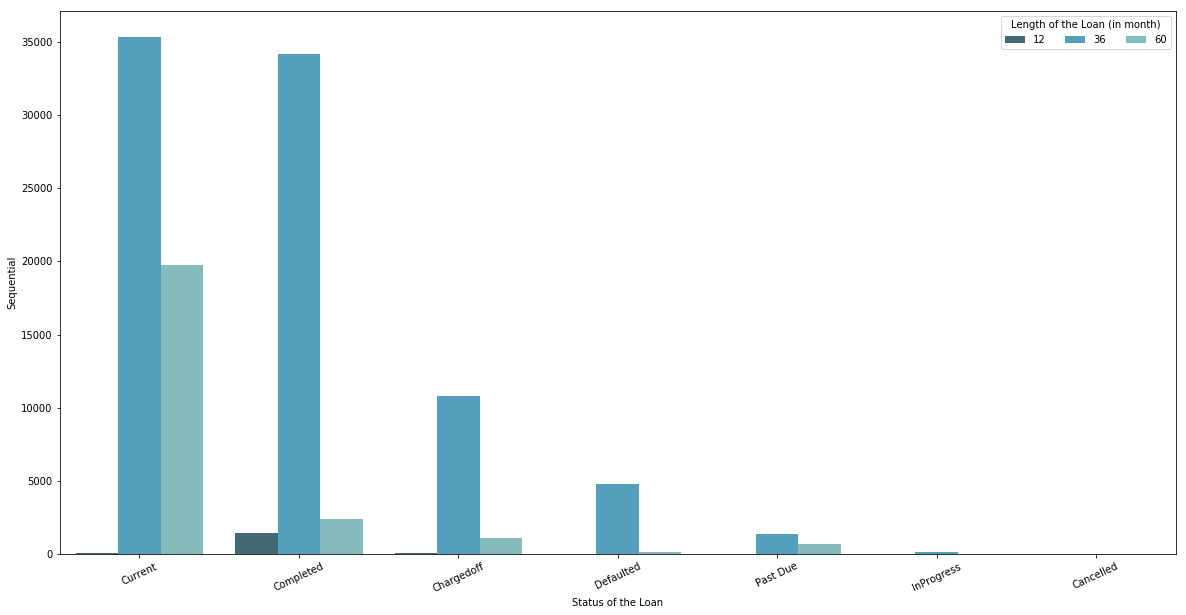

In [42]:
#plotting Term (length of the Loan) variabels against LoanStatus with help of a clusterd bar chart
plt.figure(figsize = [20,10])
ax = sb.countplot(data = loan_data_clean, x = 'LoanStatus', hue = 'Term', palette = "GnBu_d", order = loan_data_clean['LoanStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 3, title = 'Length of the Loan (in month)')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan')
ax.set_ylabel("Sequential");

#### The length of the loan seem not to have an impact on the outcome of the loan: no matter what status a loan has, the most common length is 36 month and least common is 60 month.

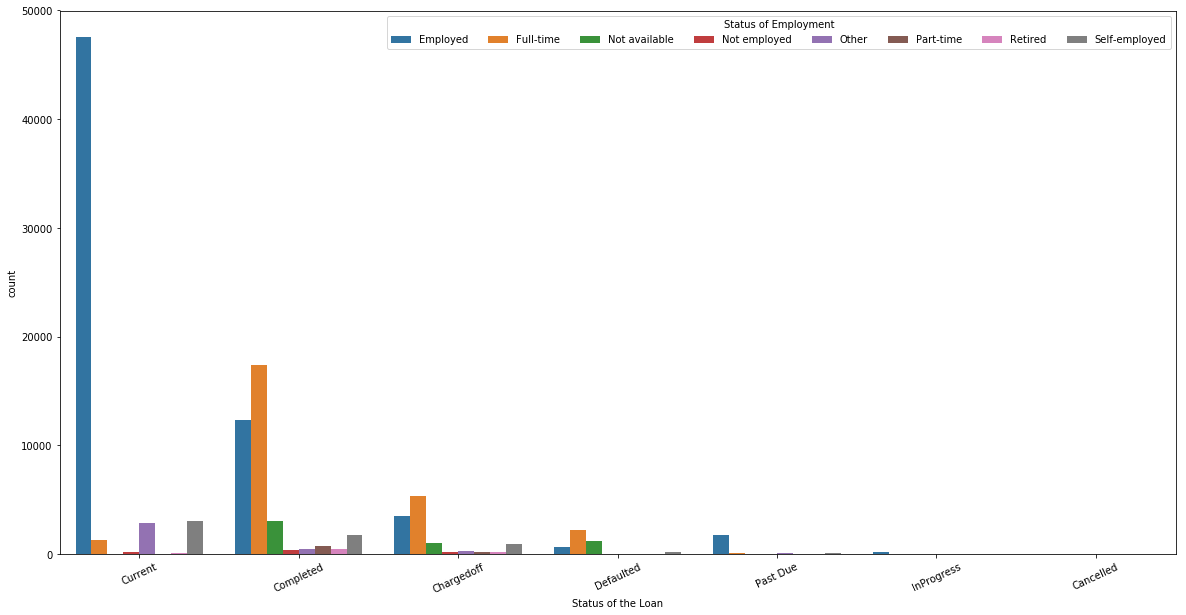

In [43]:
#plotting EmploymentStatus (Status of Employment) against LoanStatus with help of a heat map
plt.figure(figsize = [20,10])
sb.countplot(data = loan_data_clean, x = 'LoanStatus', hue = 'EmploymentStatus', order = loan_data_clean['LoanStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 8, title = 'Status of Employment')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan');


#### The status of the employment of the borrower seem not to have an impact on the outcome of the loan.

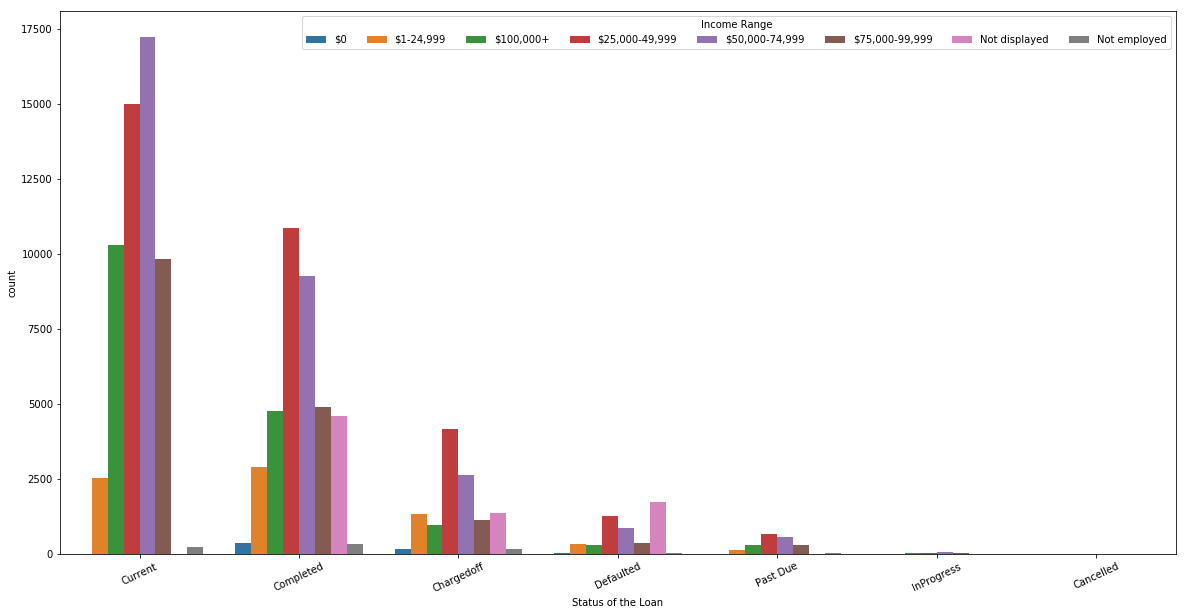

In [44]:
#plotting Income Range against LoanStatus with help of a heat map

plt.figure(figsize = [20,10])
sb.countplot(data = loan_data_clean, x = 'LoanStatus', hue = 'IncomeRange', order = loan_data_clean['LoanStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 8, title = 'Income Range')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan');

#### The Income Range of the borrower seem not to have an impact on the outcome of the loan.

In [45]:
#plotting ProsperScore against LoanStatus with help of a heat map

# In the first step I need to reshape the data to
ct_counts = loan_data_clean.groupby(['LoanStatus', 'ProsperScore']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'ProsperScore', columns = 'LoanStatus', values = 'count')
ct_counts

LoanStatus,Chargedoff,Completed,Current,Defaulted,InProgress,Past Due
ProsperScore,,,,,,
1.0,235,341,337,37,2,40
2.0,377,848,4196,70,23,252
3.0,414,1077,5804,75,20,252
4.0,784,1828,9476,119,28,360
5.0,907,2212,6222,165,25,282
6.0,925,2847,7981,173,25,327
7.0,662,2357,7210,135,16,217
8.0,666,3711,7265,139,39,233
9.0,309,2836,3612,71,13,70


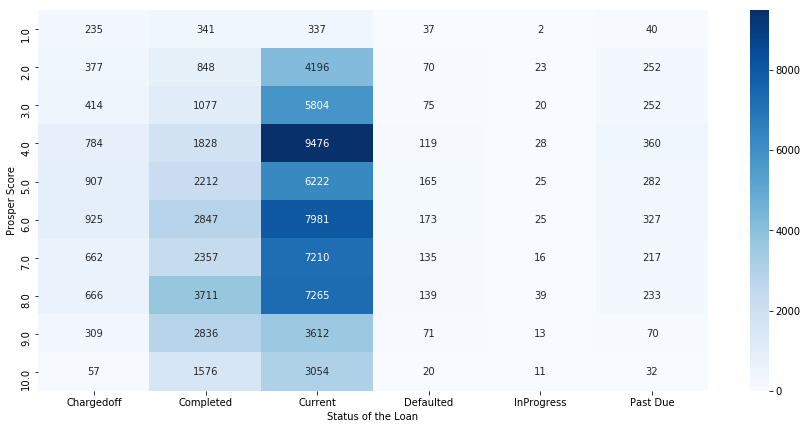

In [46]:
#plotting ProsperScore against LoanStatus with help of a heat map
plt.figure(figsize = [15,7])
mask = ct_counts.isnull()
sb.heatmap(ct_counts, annot = True, fmt = 'd', cmap = 'Blues',mask = mask)
plt.xlabel('Status of the Loan')
plt.ylabel('Prosper Score');

#### The Prosper Score seem to affect the outcome of the loan: so have the most borrower an Prosper Score of 8 when a loan is completed, while most borrower with defaulted and charged-off loans have an Prosper Score of 6.  Furthermore, the most comon Prosper Score for borrowers with loans that have past due payments is 4.

### Observed relationships between the variables of interest and the status of loan

- relationship between the monthly payments and the negative outcome of the loan for Prosper: loans that are charged-   off, loans with past due payments and defaulted loans have in average higher monthly payments
- loans that are charged-off, loans with past due payments and defaulted loans have in average higher interest rates   than loans that are completed
- the highest interest rates are asscociated with loans that are charged-off and with loans that have past due payments
- original loan amount does not have an impact with the final status of the loan: the original loan amount is about the same in average for loans that are completed, charged-off or defaulted. However, loans with past due payments have in average an higher orginal loan amount
- The Prosper Score seem to affect the outcome of the loan: so have the most borrower an Prosper Score of 8 when a loan is completed, while most borrower with defaulted and charged-off loans have an Prosper Score of 6.  Furthermore, the most comon Prosper Score for borrowers with loans that have past due payments is 4.

## Multivariate Exploration

#### I would like to further investigate the relationship between the status/outcome of a loan and the Prosper Score in relation to the interest rate, On time Payments  since they seem to have the strongest impact on the outcome of a loan.

Text(63.125, 0.5, 'Prosper Score')

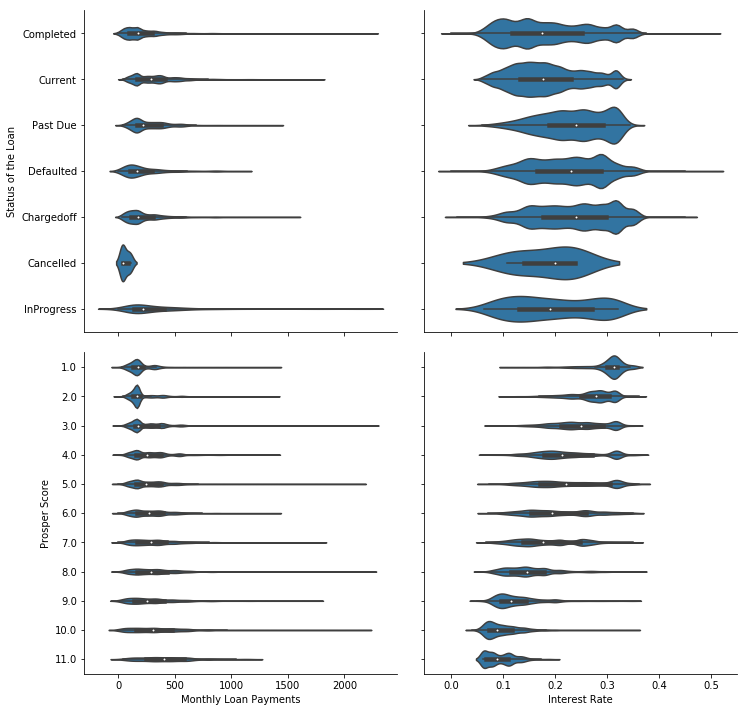

In [9]:
g = sb.PairGrid(data = loan_data_clean, x_vars = ['MonthlyLoanPayment', 'BorrowerRate'],
                y_vars = ['LoanStatus','ProsperScore'], height = 5, aspect = 1)
g.map(sb.violinplot)
g.axes[1,0].set_xlabel('Monthly Loan Payments')
g.axes[1,1].set_xlabel('Interest Rate')
g.axes[0,0].set_ylabel('Status of the Loan')
g.axes[1,0].set_ylabel('Prosper Score')

#### The figure shows that the interest rate is as well correlated to the Prosper Score as to the Status of the loan: the higher the Prosper Score, the lower the interest rate, the lower the risk for Prosper that the loan will be defaulted, charged-off or has past due payments. So, borrower with a low Prosper Score get a lower interest rate due to the lower risk that the loan will be defaulted .
#### On the contrary, borrower with a high Prosper Rates have higher monthly payments but higher payments are more common in loas that are defaulted, charged-off or that have past due payments. This inconsistency might be explanable by the fact that people with higher Prosper Score have higher income and therefore higher monthly payments. While borrower with low income and high monthly payments are more likley to miss a payment or default the loan.

In [48]:
# now I will save the data set as loan_data_master
loan_data_clean.to_csv('loan_data_master.csv')